LOADING AND CHECKING FOR MISSING VALUES

In [ ]:
import pandas as pd
file_path = "/content/HUMOUR_DETECTION.csv"
df = pd.read_csv(file_path)
print("Dataset Info:")
df.info()
print("\nFirst 5 Rows:")
print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    200000 non-null  object
 1   humor   200000 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 1.7+ MB

First 5 Rows:
                                                text  humor
0  Joe biden rules out 2020 bid: 'guys, i'm not r...  False
1  Watch: darvish gave hitter whiplash with slow ...  False
2  What do you call a turtle without its shell? d...   True
3      5 reasons the 2016 election feels so personal  False
4  Pasco police shot mexican migrant from behind,...  False

Missing Values:
text     0
humor    0
dtype: int64


Cleans text by lowercasing, removing punctuation & extra spaces

In [ ]:
import pandas as pd
import re

def clean_text(text):
    """Function to clean text data."""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text
df["clean_text"] = df["text"].apply(clean_text)
df.to_csv("/content/HUMOUR_DETECTION.csv", index=False)
print(df[["text", "clean_text"]].head())

                                                text  \
0  Joe biden rules out 2020 bid: 'guys, i'm not r...   
1  Watch: darvish gave hitter whiplash with slow ...   
2  What do you call a turtle without its shell? d...   
3      5 reasons the 2016 election feels so personal   
4  Pasco police shot mexican migrant from behind,...   

                                          clean_text  
0   joe biden rules out 2020 bid guys im not running  
1  watch darvish gave hitter whiplash with slow p...  
2   what do you call a turtle without its shell dead  
3      5 reasons the 2016 election feels so personal  
4  pasco police shot mexican migrant from behind ...  


TOKENIZATION

In [ ]:
import pandas as pd
import spacy

if 'text' not in df.columns:
    raise ValueError("Dataset does not contain a 'text' column.")
df['simple_tokens'] = df['text'].astype(str).apply(lambda x: x.split())
try:
    nlp = spacy.blank("en")
except OSError:
    import subprocess
    subprocess.run(["python", "-m", "spacy", "download", "en"])
    nlp = spacy.blank("en")
texts_list = df['text'].astype(str).tolist()
df['spacy_tokens'] = [list(doc) for doc in nlp.pipe(texts_list, batch_size=1000)]
output_file = "HUMOUR_DETECTION_tokenized.csv"
df.to_csv(output_file, index=False)
print(f"Tokenization completed. Processed file saved as: {output_file}")

Tokenization completed. Processed file saved as: HUMOUR_DETECTION_tokenized.csv


REMOVAL OF STOPWORDS

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
file_path = "/content/HUMOUR_DETECTION.csv"
df = pd.read_csv(file_path)
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)
df['text'] = df['text'].astype(str)
df['cleaned_text'] = df['text'].apply(remove_stopwords)
df.to_csv("cleaned_HUMOUR_DETECTION.csv", index=False)
print(df[['text', 'cleaned_text']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                                text  \
0  Joe biden rules out 2020 bid: 'guys, i'm not r...   
1  Watch: darvish gave hitter whiplash with slow ...   
2  What do you call a turtle without its shell? d...   
3      5 reasons the 2016 election feels so personal   
4  Pasco police shot mexican migrant from behind,...   

                                        cleaned_text  
0          Joe biden rules 2020 bid: 'guys, running'  
1     Watch: darvish gave hitter whiplash slow pitch  
2                   call turtle without shell? dead.  
3             5 reasons 2016 election feels personal  
4  Pasco police shot mexican migrant behind, new ...  


Class Distribution:
humor
False    100000
True     100000
Name: count, dtype: int64


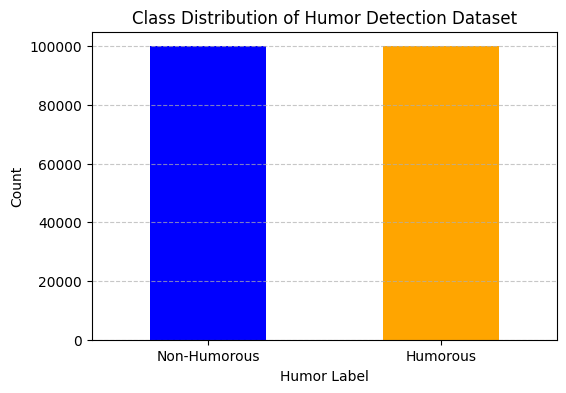

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
def plot_class_distribution(file_path):
    df = pd.read_csv(file_path)
    class_counts = df['humor'].value_counts()
    print("Class Distribution:")
    print(class_counts)
    plt.figure(figsize=(6, 4))
    class_counts.plot(kind='bar', color=['blue', 'orange'])
    plt.xlabel("Humor Label")
    plt.ylabel("Count")
    plt.title("Class Distribution of Humor Detection Dataset")
    plt.xticks(ticks=[0, 1], labels=['Non-Humorous', 'Humorous'], rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
file_path = "HUMOUR_DETECTION.csv"
plot_class_distribution(file_path)


SKEWNESS AND KURTOSIS

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
file_path = "HUMOUR_DETECTION.csv"
def analyze_text_length_distribution(file_path):
    df = pd.read_csv(file_path)
    df['text_length'] = df['text'].apply(len)
    skewness = skew(df['text_length'])
    kurt = kurtosis(df['text_length'])
    print(f"Skewness of text length distribution: {skewness:.4f}")
    print(f"Kurtosis of text length distribution: {kurt:.4f}")
analyze_text_length_distribution(file_path)

Skewness of text length distribution: 0.1017
Kurtosis of text length distribution: -0.6899


Text Length Analysis: Compare humorous vs. non-humorous texts

Average text length (Humorous): 69.99
Average text length (Non-Humorous): 64.95


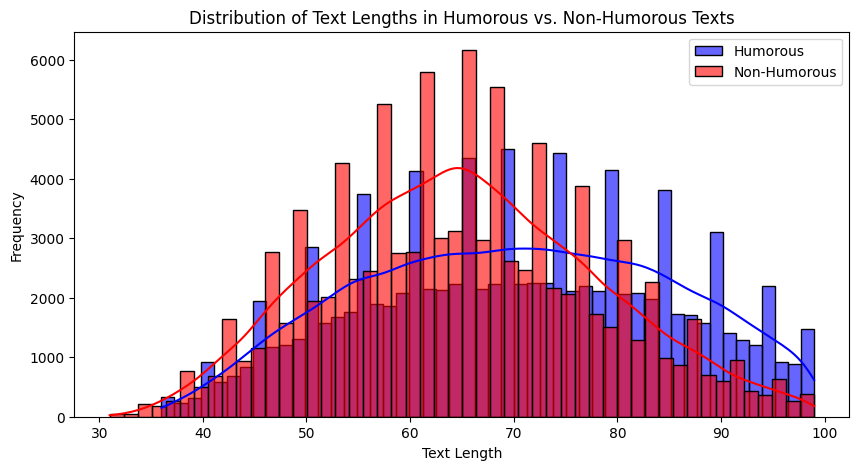

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "HUMOUR_DETECTION.csv"
df = pd.read_csv(file_path)
df["text_length"] = df["text"].apply(len)
avg_length_humorous = df[df["humor"] == True]["text_length"].mean()
avg_length_non_humorous = df[df["humor"] == False]["text_length"].mean()
print(f"Average text length (Humorous): {avg_length_humorous:.2f}")
print(f"Average text length (Non-Humorous): {avg_length_non_humorous:.2f}")
plt.figure(figsize=(10, 5))
sns.histplot(df[df["humor"] == True]["text_length"], bins=50, label="Humorous", color="blue", kde=True, alpha=0.6)
sns.histplot(df[df["humor"] == False]["text_length"], bins=50, label="Non-Humorous", color="red", kde=True, alpha=0.6)
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Distribution of Text Lengths in Humorous vs. Non-Humorous Texts")
plt.legend()
plt.show()

WORD FREQUENCY ANALYSIS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


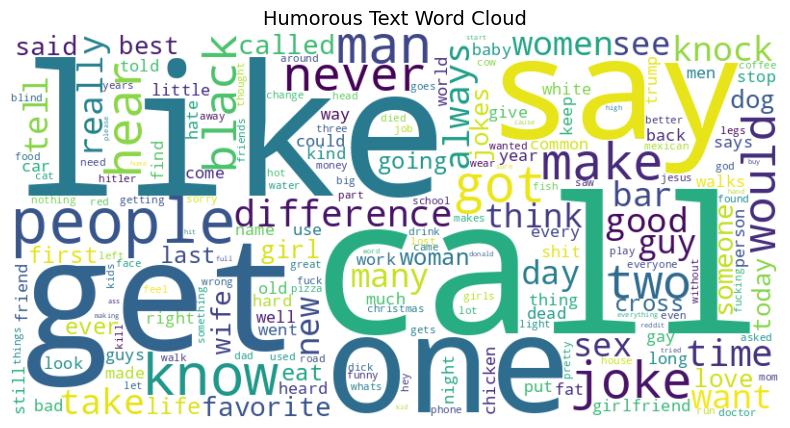

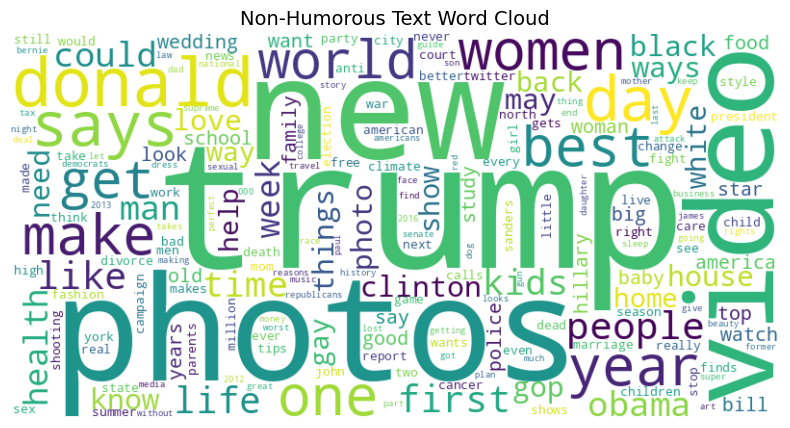

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    words = re.findall(r'\b\w{3,}\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words
def get_word_frequencies(texts):
    all_words = []
    for text in texts:
        all_words.extend(preprocess_text(text))
    return dict(pd.Series(all_words).value_counts())
def generate_wordcloud(word_freq, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=14)
    plt.show()
file_path = "HUMOUR_DETECTION.csv"
df = pd.read_csv(file_path)
humorous_texts = df[df['humor'] == True]['text'].dropna()
non_humorous_texts = df[df['humor'] == False]['text'].dropna()
humor_freq = get_word_frequencies(humorous_texts)
non_humor_freq = get_word_frequencies(non_humorous_texts)
generate_wordcloud(humor_freq, "Humorous Text Word Cloud")
generate_wordcloud(non_humor_freq, "Non-Humorous Text Word Cloud")

N-GRAMS

Most Common Bigrams: [(('do', 'you'), 11029), (('What', 'do'), 9147), (('you', 'call'), 6902), (('in', 'the'), 5568), (('did', 'the'), 5018), (('call', 'a'), 4829), (('of', 'the'), 4279), (('to', 'the'), 3816), (('What', 'did'), 3167), (('Why', 'did'), 2979)]
Most Common Trigrams: [(('What', 'do', 'you'), 7692), (('do', 'you', 'call'), 6786), (('you', 'call', 'a'), 4702), (('Why', 'did', 'the'), 2135), (('What', 'did', 'the'), 2116), (('How', 'do', 'you'), 2068), (('the', 'difference', 'between'), 1914), (("What's", 'the', 'difference'), 1380), (('Did', 'you', 'hear'), 1362), (('you', 'hear', 'about'), 1129)]


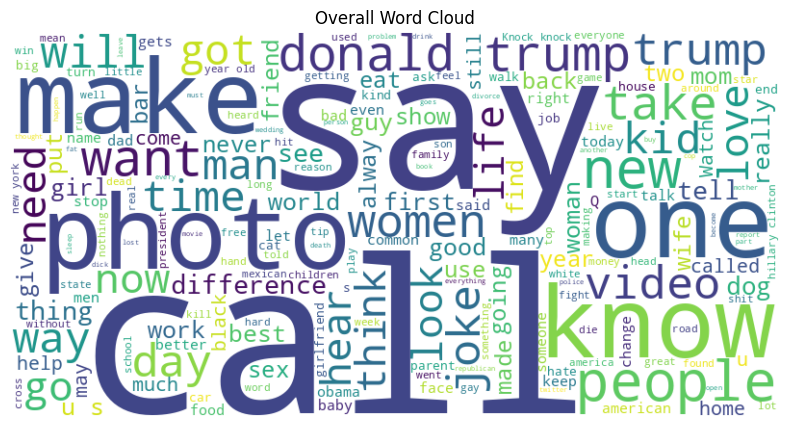

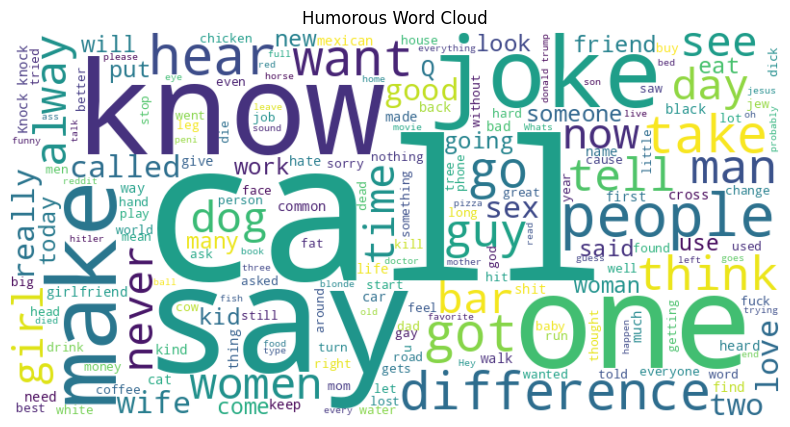

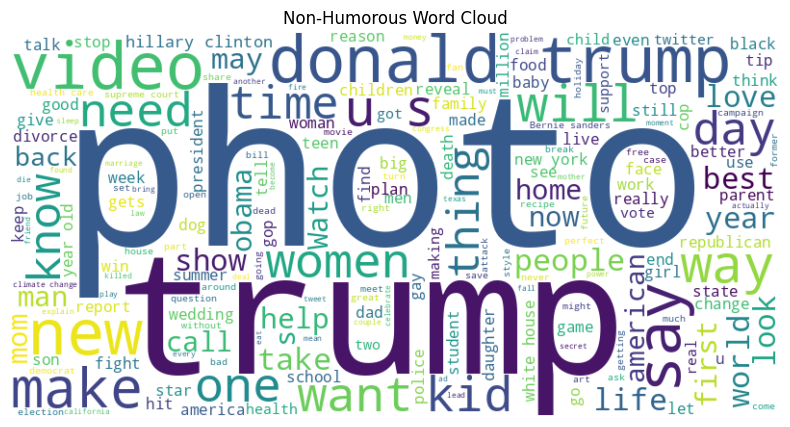

In [ ]:
import pandas as pd
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
df = pd.read_csv("HUMOUR_DETECTION.csv")
def get_ngrams(texts, n=2):
    all_ngrams = []
    for text in texts:
        all_ngrams.extend(ngrams(text.split(), n))
    return Counter(all_ngrams)
bigram_counts = get_ngrams(df['text'], n=2)
trigram_counts = get_ngrams(df['text'], n=3)
print("Most Common Bigrams:", bigram_counts.most_common(10))
print("Most Common Trigrams:", trigram_counts.most_common(10))
def generate_wordcloud(texts, title="Word Cloud"):
    text = ' '.join(str(t) for t in texts)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()
generate_wordcloud(df['text'], title="Overall Word Cloud")
generate_wordcloud(df[df['humor'] == True]['text'], title="Humorous Word Cloud")
generate_wordcloud(df[df['humor'] == False]['text'], title="Non-Humorous Word Cloud")

BOX PLOT WITH AND WITHOUT OUTLIERS

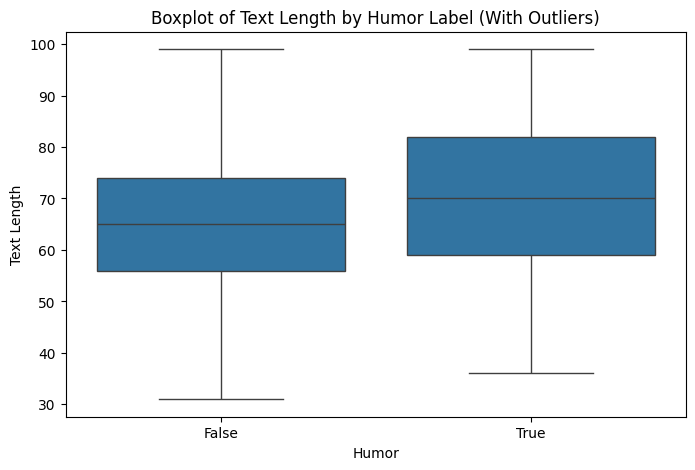

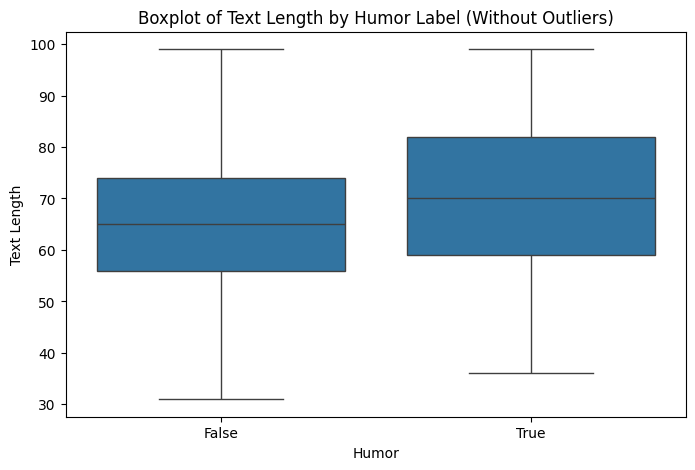

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def load_data(file_path):
    return pd.read_csv(file_path)
def add_text_length(df):
    df['text_length'] = df['text'].apply(len)
    return df
def plot_boxplot_with_outliers(df):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='humor', y='text_length', data=df)
    plt.title("Boxplot of Text Length by Humor Label (With Outliers)")
    plt.xlabel("Humor")
    plt.ylabel("Text Length")
    plt.show()
def plot_boxplot_without_outliers(df):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='humor', y='text_length', data=df, showfliers=False)
    plt.title("Boxplot of Text Length by Humor Label (Without Outliers)")
    plt.xlabel("Humor")
    plt.ylabel("Text Length")
    plt.show()
def main(file_path):
    df = load_data(file_path)
    df = add_text_length(df)
    plot_boxplot_with_outliers(df)
    plot_boxplot_without_outliers(df)
main("HUMOUR_DETECTION.csv")

SCATTER PLOT

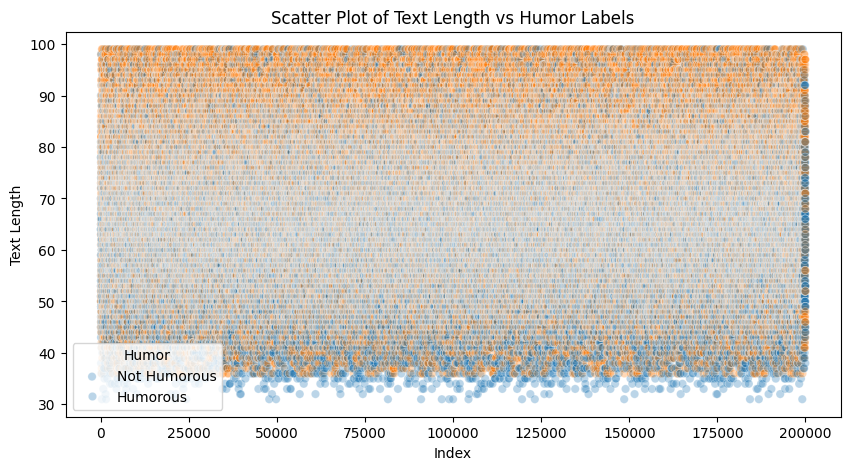

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "HUMOUR_DETECTION.csv"
df = pd.read_csv(file_path)
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.index, y=df['text_length'], hue=df['humor'], alpha=0.3)
plt.xlabel("Index")
plt.ylabel("Text Length")
plt.title("Scatter Plot of Text Length vs Humor Labels")
plt.legend(title="Humor", labels=["Not Humorous", "Humorous"])
plt.show()

HISTOGRAM

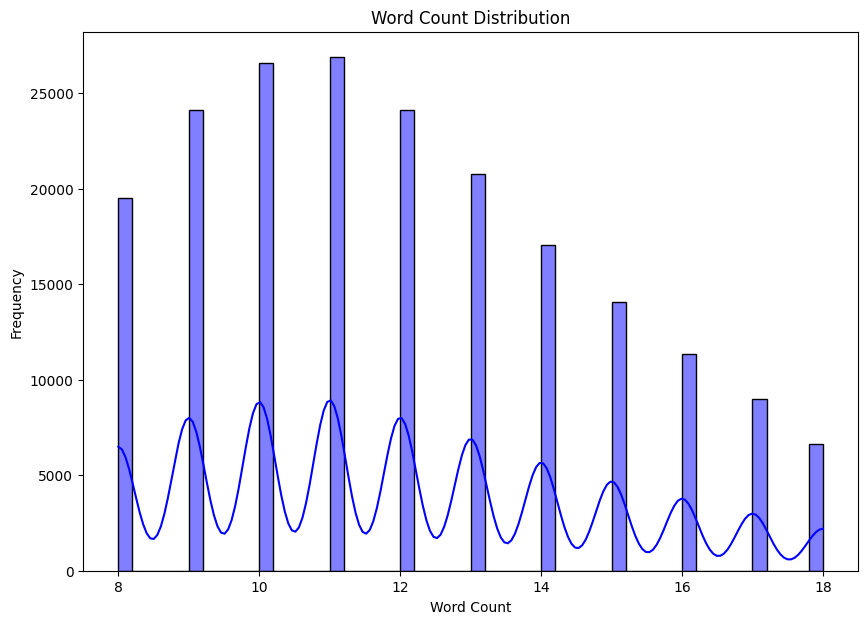

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "/content/HUMOUR_DETECTION_tokenized.csv"
df = pd.read_csv(file_path)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 7))
sns.histplot(df['word_count'], bins=50, kde=True, color='blue')
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

In [ ]:
pip install pandas scikit-learn gensim tensorflow tensorflow-hub nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 11.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1



Convert text to numerical representations:

TF-IDF

Word2Vec embeddings

Universal Sentence Encoder (USE) embeddings


In [ ]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [ ]:
pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=bff526ca4a5d46f57694bcb4b484f6f34a2dbfeb0979ab62c40091069817aa5b
  Stored in directory: /root/.cache/pip/wheels/ef/7f/bd/9bed48f078f3ee1fa75e0b29b6e0335ce1cb03a38d3443b3a3
Successfully built swifter


In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


Logistic Regression

Naïve Bayes

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
data_path = "/content/HUMOUR_DETECTION_tokenized.csv"
df = pd.read_csv(data_path, low_memory=False)
df.dropna(inplace=True)
df['humor'] = df['humor'].astype(int)
X = df['text']
y = df['humor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)
y_pred_log = log_reg.predict(X_test_tfidf)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)
print("\nNaïve Bayes Performance:")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     20001
           1       0.88      0.88      0.88     19999

    accuracy                           0.88     40000
   macro avg       0.88      0.88      0.88     40000
weighted avg       0.88      0.88      0.88     40000

Accuracy: 0.882675

Naïve Bayes Performance:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87     20001
           1       0.87      0.88      0.87     19999

    accuracy                           0.87     40000
   macro avg       0.87      0.87      0.87     40000
weighted avg       0.87      0.87      0.87     40000

Accuracy: 0.8744


In [ ]:
!pip install --upgrade numpy tensorflow tensorflow-hub

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached tensorflow-2.19.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached numpy-2.1.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)


USE USING LSTM

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/HUMOUR_DETECTION.csv')

# Load Universal Sentence Encoder
use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Embed text
def embed_text(text_list):
    return use_model(text_list).numpy()

X = embed_text(df['text'].tolist())
y = df['humor'].astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X.shape[1], 1)),
    Dropout(0.5),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train and capture history
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Save model
model.save("humor_detection_use_lstm.h5")

# Save training history to CSV
history_df = pd.DataFrame(history.history)
history_df.to_csv("lstm_training_history.csv", index=False)
print("Training history saved to lstm_training_history.csv")

# Reload model for prediction
loaded_model = load_model("humor_detection_use_lstm.h5")

# Prediction function
def predict_humor(text):
    embedding = embed_text([text])
    embedding = embedding.reshape((embedding.shape[0], embedding.shape[1], 1))
    prediction = loaded_model.predict(embedding)[0][0]
    return "Humorous" if prediction > 0.5 else "Not Humorous"

# Test
example_text = "Why don’t scientists trust atoms? Because they make up everything!"
print(f"Prediction: {predict_humor(example_text)}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 2149s 429ms/step - accuracy: 0.6266 - loss: 0.6394 - val_accuracy: 0.6994 - val_loss: 0.5768
Epoch 2/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 2146s 422ms/step - accuracy: 0.7187 - loss: 0.5499 - val_accuracy: 0.7535 - val_loss: 0.5062
Epoch 3/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 2133s 424ms/step - accuracy: 0.7400 - loss: 0.5233 - val_accuracy: 0.7581 - val_loss: 0.4975
Epoch 4/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 2126s 425ms/step - accuracy: 0.7545 - loss: 0.5048 - val_accuracy: 0.7370 - val_loss: 0.5281
Epoch 5/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 2170s 423ms/step - accuracy: 0.7664 - loss: 0.4854 - val_accuracy: 0.6674 - val_loss: 0.6111


Training history saved to lstm_training_history.csv
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
Prediction: Humorous


use using bi-lstm

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

df = pd.read_csv("HUMOUR_DETECTION.csv")

# Load Universal Sentence Encoder
use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Embed the text
def embed_text(text_list):
    return use_model(text_list).numpy()

X = embed_text(df['text'].tolist())
y = df['humor'].astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build Bi-LSTM model
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1))),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train and capture history
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Save model
model.save("humor_detection_use_bilstm.h5")

# Save training history to CSV
history_df = pd.DataFrame(history.history)
history_df.to_csv("bilstm_training_history.csv", index=False)
print("BiLSTM training history saved to bilstm_training_history.csv")

# Reload model for prediction
loaded_model = load_model("humor_detection_use_bilstm.h5")

# Prediction function
def predict_humor(text):
    embedding = embed_text([text])
    embedding = embedding.reshape((embedding.shape[0], embedding.shape[1], 1))
    prediction = loaded_model.predict(embedding)[0][0]
    return "Humorous" if prediction > 0.5 else "Not Humorous"

# Example prediction
example_text = "Why don’t scientists trust atoms? Because they make up everything!"
print(f"Prediction: {predict_humor(example_text)}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 1547s 728ms/step - accuracy: 0.6084 - loss: 0.6484 - val_accuracy: 0.7059 - val_loss: 0.5710
Epoch 2/5
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 1605s 739ms/step - accuracy: 0.7293 - loss: 0.5421 - val_accuracy: 0.7697 - val_loss: 0.4829
Epoch 3/5
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 1564s 739ms/step - accuracy: 0.7644 - loss: 0.4903 - val_accuracy: 0.7736 - val_loss: 0.4764
Epoch 4/5
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 1556s 735ms/step - accuracy: 0.7835 - loss: 0.4601 - val_accuracy: 0.7943 - val_loss: 0.4468
Epoch 5/5
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 1583s 736ms/step - accuracy: 0.8012 - loss: 0.4330 - val_accuracy: 0.7854 - val_loss: 0.4533


BiLSTM training history saved to bilstm_training_history.csv


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step
Prediction: Humorous


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 2053s 409ms/step - accuracy: 0.6176 - loss: 0.6472 - val_accuracy: 0.5000 - val_loss: 0.6946
Epoch 2/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 2077s 412ms/step - accuracy: 0.5507 - loss: 0.6737 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 3/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 2088s 418ms/step - accuracy: 0.5141 - loss: 0.6921 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 2127s 419ms/step - accuracy: 0.5011 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 2125s 419ms/step - accuracy: 0.5009 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 1/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 3927s 784ms/step - accuracy: 0.5740 - loss: 0.6706 - val_accuracy: 0.6992 - val_loss: 0.5741
Epoch 2/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 3950s 790ms/step - accuracy: 0.7137 - loss: 0.5602 - val_accuracy: 0.7835 - val_loss: 0.4612
Epoch 3/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 3937s 781ms/step - ac

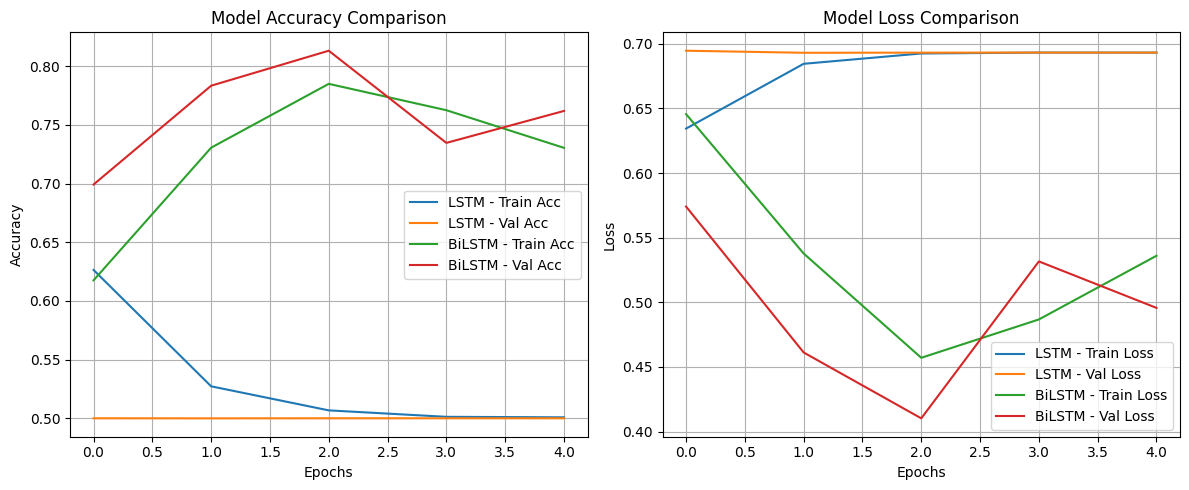

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv("HUMOUR_DETECTION.csv")

# Load Universal Sentence Encoder
use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Embed text
def embed_text(text_list):
    return use_model(text_list).numpy()
X = embed_text(df['text'].tolist())
y = df['humor'].astype(int)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
# LSTM Model
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.5),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_history = lstm_model.fit(X_train_reshaped, y_train, epochs=5, batch_size=32, validation_data=(X_test_reshaped, y_test))
# BiLSTM Model
bilstm_model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1))),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
bilstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
bilstm_history = bilstm_model.fit(X_train_reshaped, y_train, epochs=5, batch_size=32, validation_data=(X_test_reshaped, y_test))
# Plot Comparison Graphs
plt.figure(figsize=(12, 5))
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='LSTM - Train Acc')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM - Val Acc')
plt.plot(bilstm_history.history['accuracy'], label='BiLSTM - Train Acc')
plt.plot(bilstm_history.history['val_accuracy'], label='BiLSTM - Val Acc')
plt.title("Model Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'], label='LSTM - Train Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM - Val Loss')
plt.plot(bilstm_history.history['loss'], label='BiLSTM - Train Loss')
plt.plot(bilstm_history.history['val_loss'], label='BiLSTM - Val Loss')
plt.title("Model Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()